In [1]:
import torch
from sklearn.datasets import make_circles


In [24]:
n_samples=1000

X,y=make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)



In [25]:
X[:10],y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [26]:
import pandas as pd
df=pd.DataFrame({

    "X1":X[:,0],

    "X2":X[:,1],
    "label":y
}
)

df

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [30]:
df.label.value_counts()

,count
label,
1,500
0,500


<ipython-input-28-011675a7ab23>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=X[:,0],


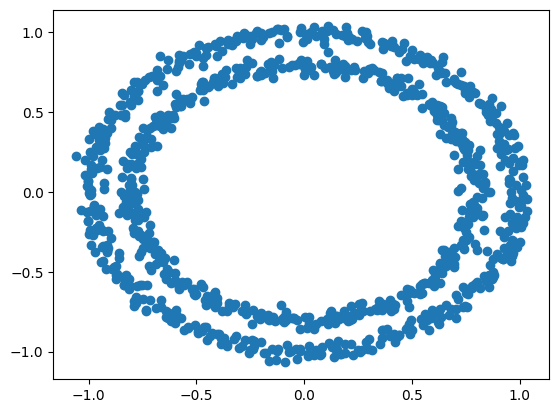

In [28]:
#viewing the data in matplotlib
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [32]:
X.shape,y.shape

((1000, 2), (1000,))

In [33]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [39]:
#turning data into tensors
X_tensor=torch.from_numpy(X).type(torch.float)
y_tensor=torch.from_numpy(y).type(torch.float)

In [38]:
type(X_tensor),X_tensor.dtype

(torch.Tensor, torch.float32)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [41]:
#checking device
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [42]:
#creating a model

from torch import nn


class make_circle_v1(nn.Module):
  def __init__(self):
    super().__init__()
    layer1=nn.Linear(in_features=2, out_features=5)

    layer2=nn.Linear(in_features=5, out_features=1)

  def forward(self,x):
    return self.layer2(self.layer1(x))

model1=make_circle_v1().to(device)